In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Data Selection

We’ll primarily work with 'bank-full.csv' as it contains the full data with the most features. We’ll use the smaller datasets for validation or testing if needed.

In [10]:
# File path
file_path = 'data/bank-full.csv'

# Load dataset
bank_data = pd.read_csv(file_path)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
bank_data.shape


(45211, 17)

###  Data Cleaning

In [ ]:
# no null values in dataset and all datatypes are in the  correct format

bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
# Check for missing values
missing_values = bank_data.isnull().sum()

# Display the results
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
# Check for duplicate rows
duplicates = bank_data.duplicated().sum()

# Display the result
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


no duplicates
no missing values 

### EDA


In [18]:
# summary statistics
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Univariate Analysis

1. Numerical Features

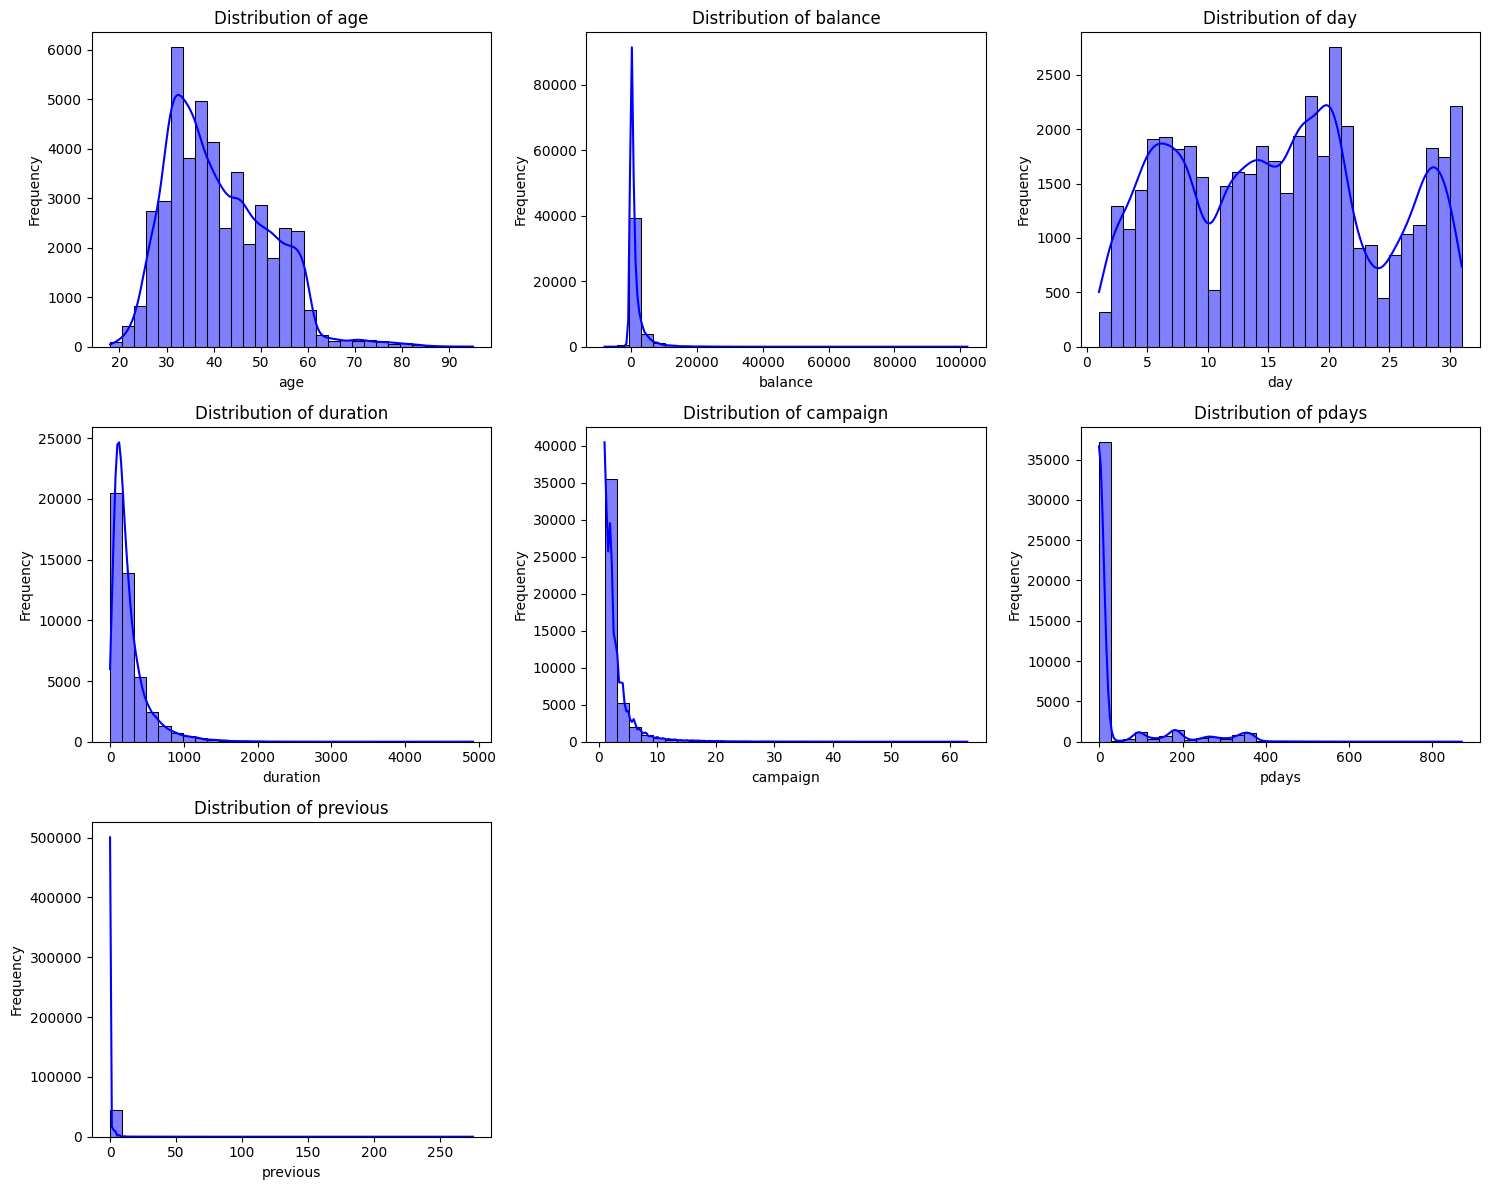

In [19]:

# List of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bank_data[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Categorical Features

In [20]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Display value counts for each categorical feature
for feature in categorical_features:
    print(f"Value counts for {feature}:")
    print(bank_data[feature].value_counts())
    print("\n")


Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64


Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64


Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Value counts for month:
month
may    13766
jul 

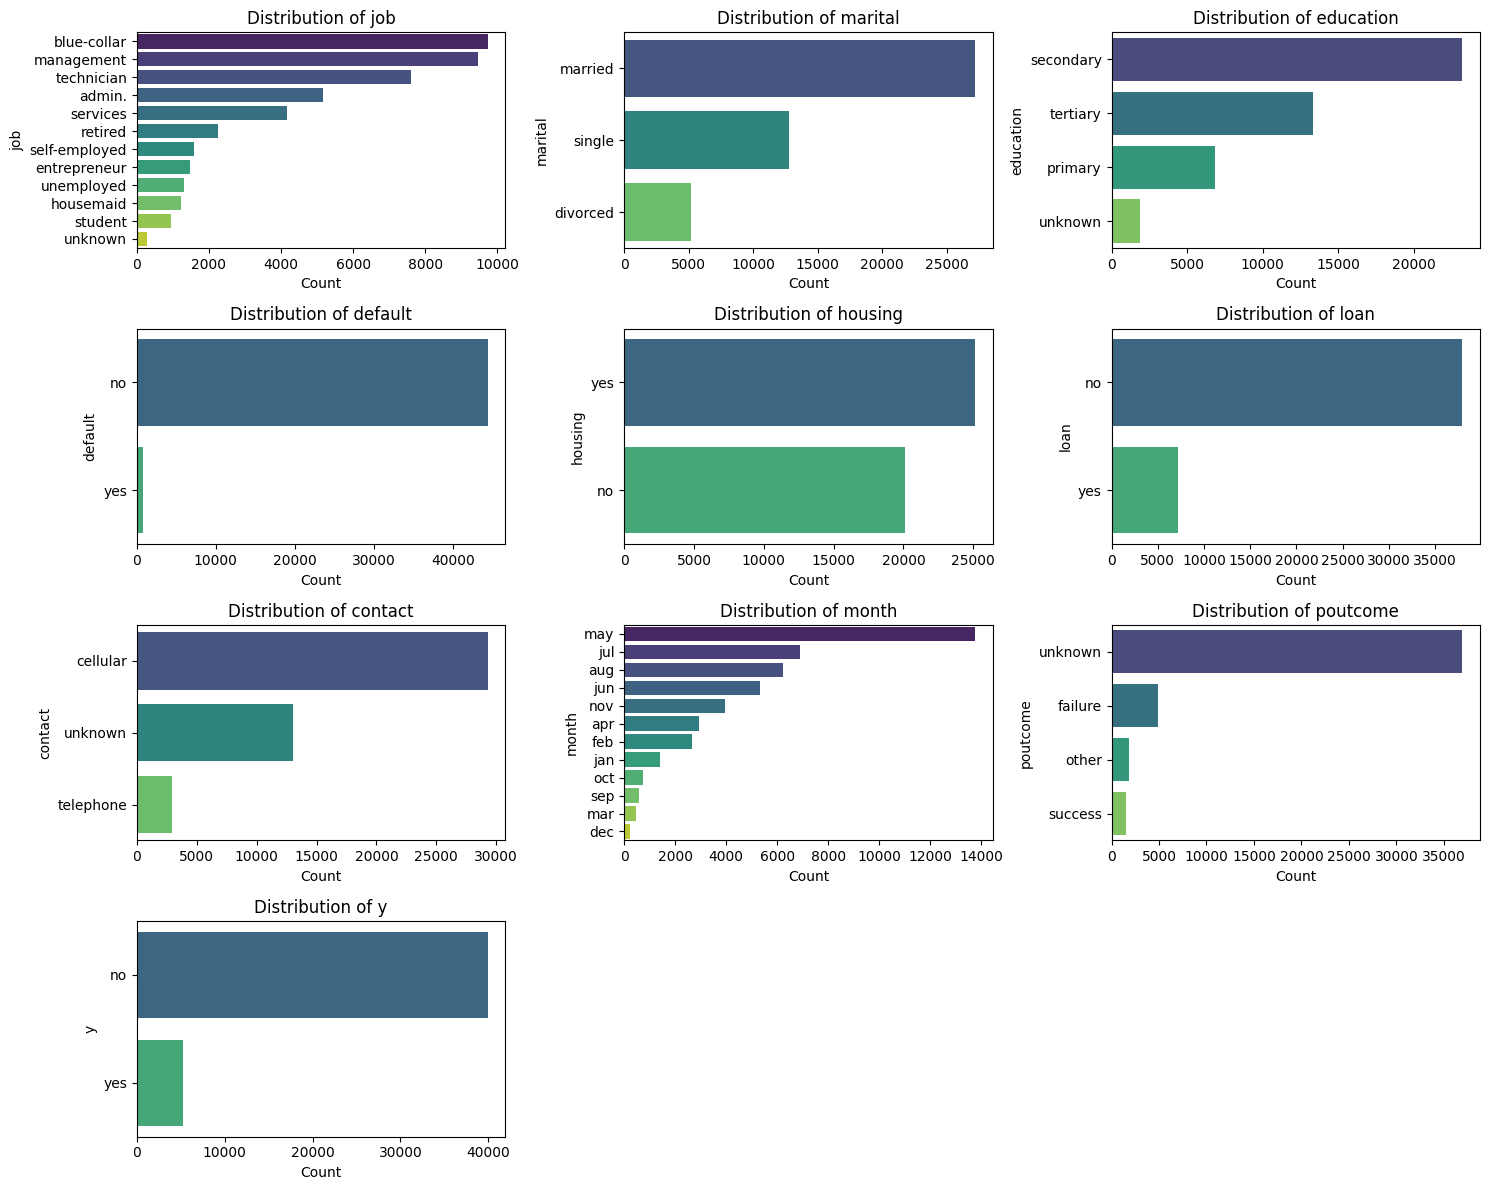

In [21]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=bank_data[feature], order=bank_data[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


#### Bivariate Analysis

#### I examine the distribution of the target variable, which indicates whether the client subscribed to a term deposit ("yes" or "no")

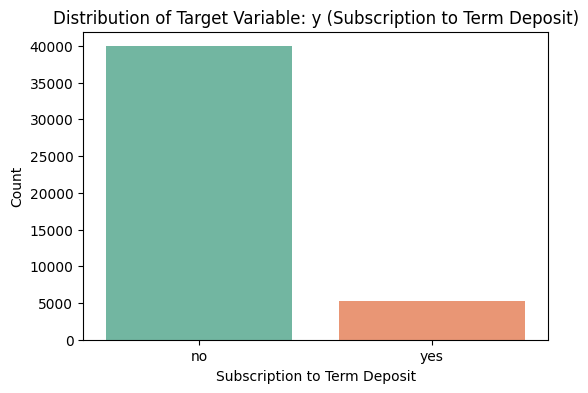

Target variable distribution (normalized):
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [17]:
# Plot the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_data, palette='Set2')
plt.title('Distribution of Target Variable: y (Subscription to Term Deposit)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

# Check the proportion of yes/no
target_distribution = bank_data['y'].value_counts(normalize=True)
print("Target variable distribution (normalized):")
print(target_distribution)


 This gives us insights into how balanced the target classes are precisely the proportion of clients who subscribed vs. those who did not

Categorical Features vs Target Variable (y)

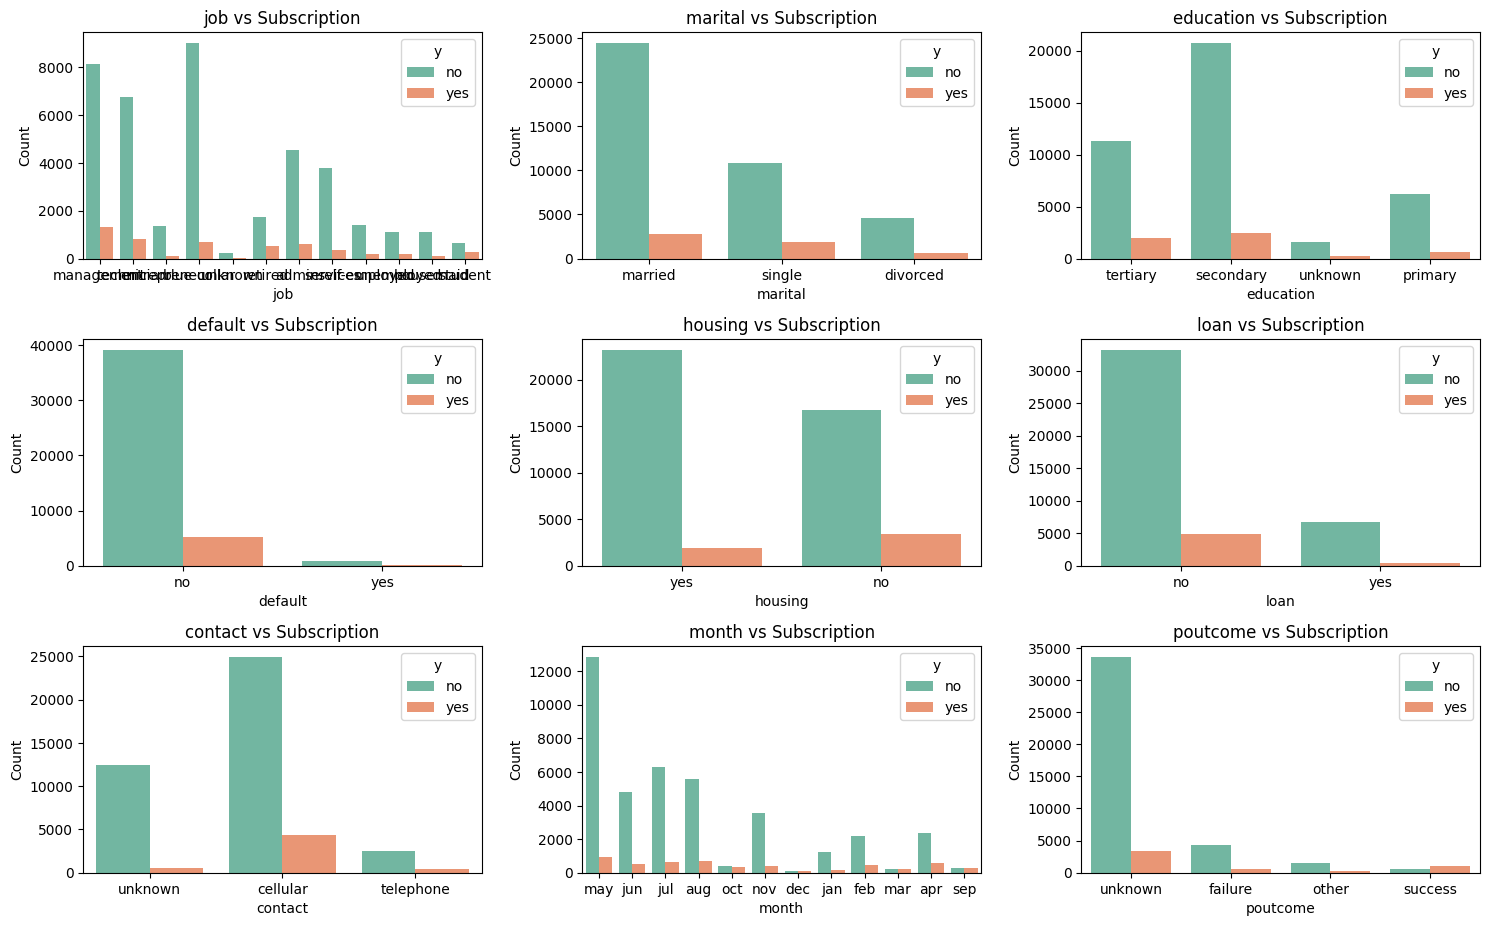

In [22]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, hue='y', data=bank_data, palette='Set2')
    plt.title(f'{feature} vs Subscription')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Numerical Features vs Target Variable (y)
I visualize the relationships between various features and the target variable. For numerical features

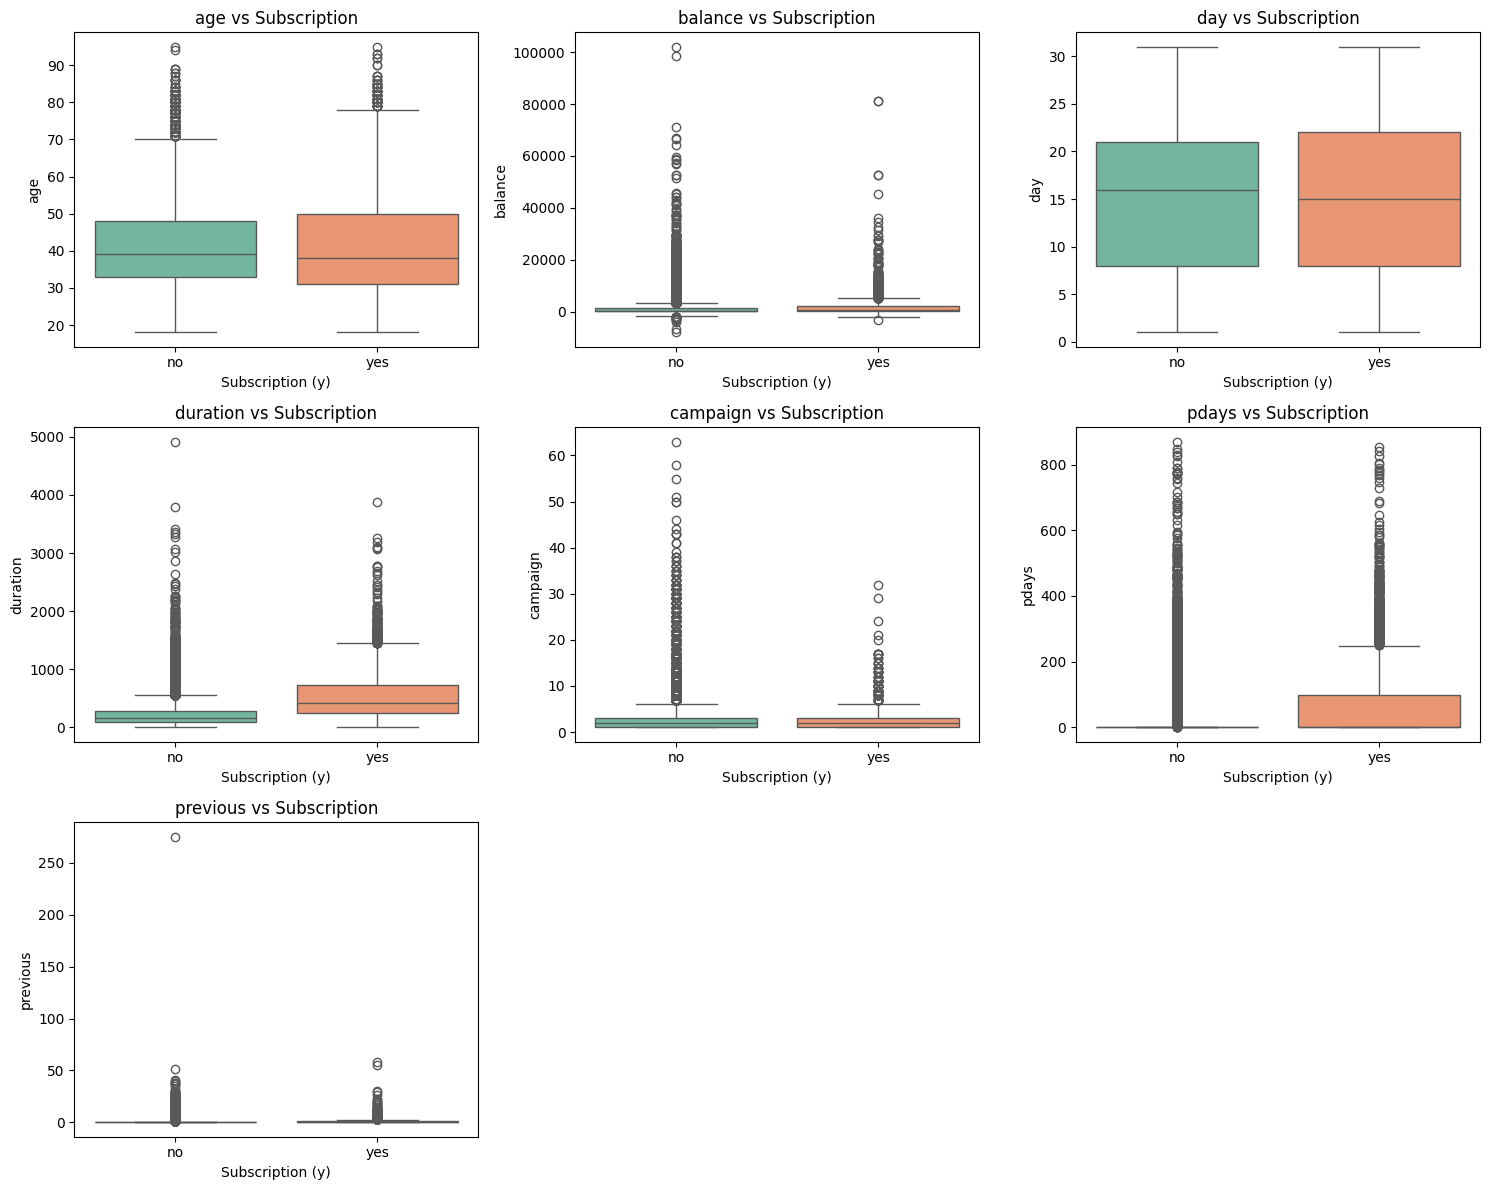

In [23]:
# List of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plot box plots to compare numerical features with the target variable
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='y', y=feature, data=bank_data, palette='Set2')
    plt.title(f'{feature} vs Subscription')
    plt.xlabel('Subscription (y)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Correlation Between Numerical Features and Target Variable

In [24]:
# Convert 'y' to binary (1 for 'yes', 0 for 'no')
bank_data['y_binary'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Correlation between numerical features and target variable
correlation_with_y = bank_data[numerical_features + ['y_binary']].corr()['y_binary'].sort_values(ascending=False)

print("Correlation of numerical features with the target variable (y):")
print(correlation_with_y)


Correlation of numerical features with the target variable (y):
y_binary    1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y_binary, dtype: float64


#### Multivariate Analysis

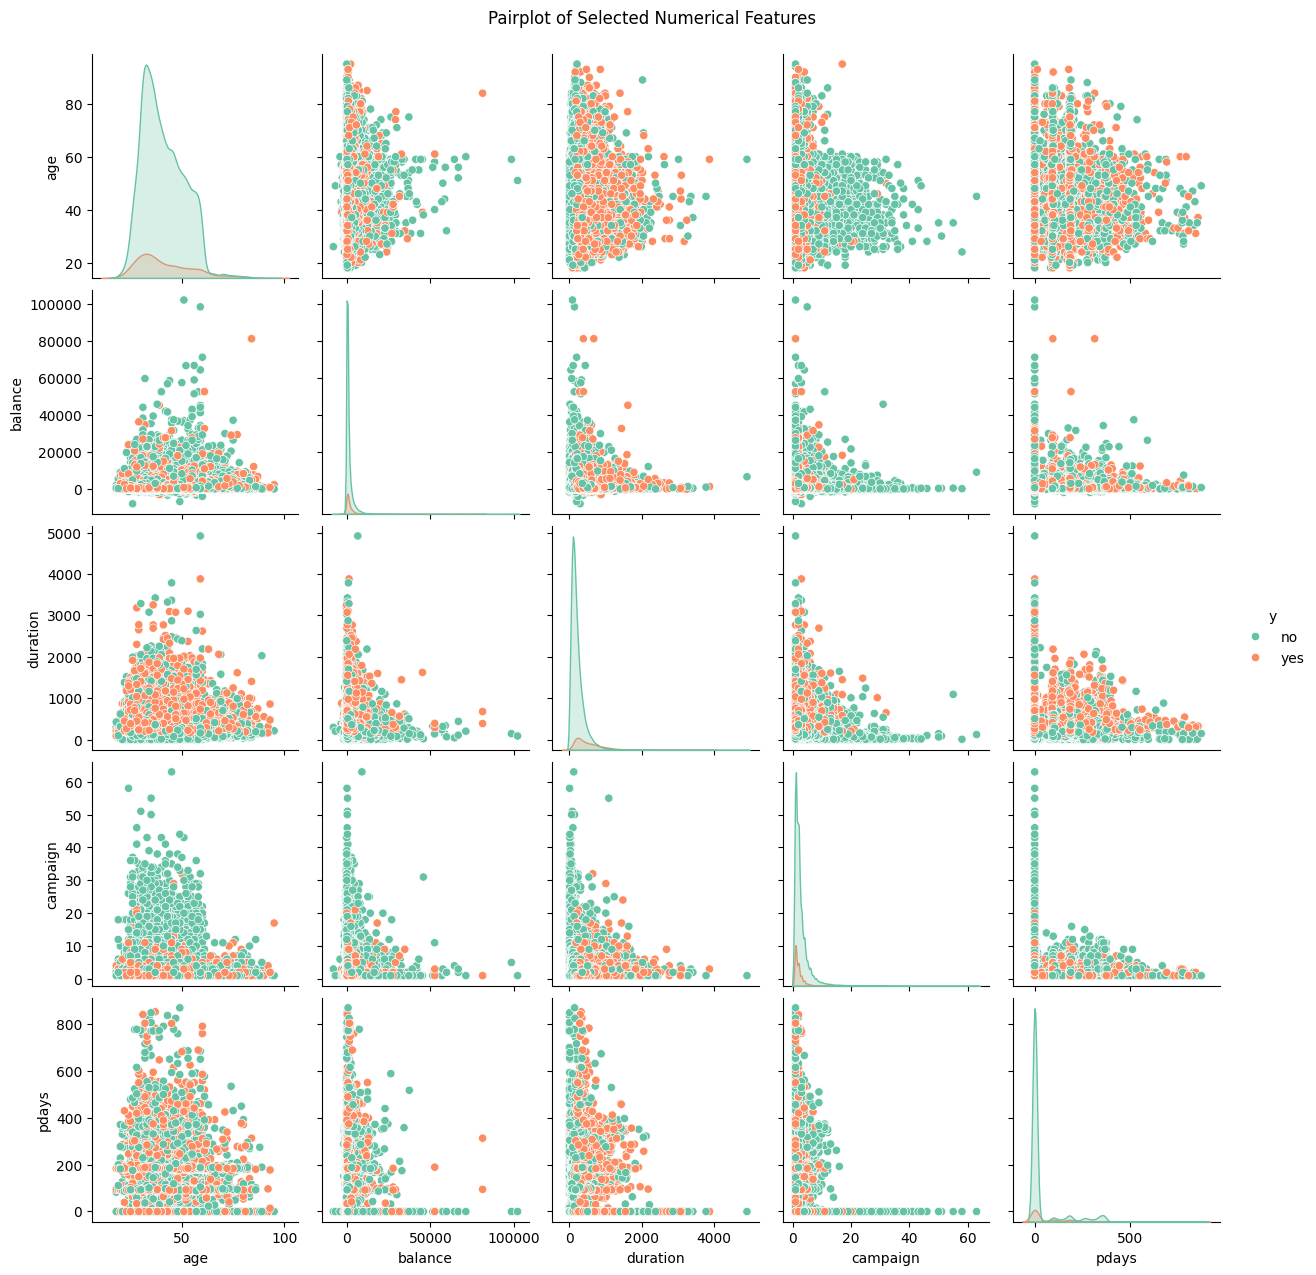

In [26]:
# Select a subset of numerical features for visualization to avoid overcrowding
selected_features = ['age', 'balance', 'duration', 'campaign', 'pdays']

# Create a pairplot for selected features
sns.pairplot(bank_data, vars=selected_features, hue='y', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()
